# TRAFFIC SIGN RECOGNITION BY TEAM-'FUTURE SCIENCE'

#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Make the plots bigger by default and setting the default line width

In [3]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [4]:
data_dir = 'C:\\Users\\Nishant\Downloads\\TechSaksham-Program-Final-Project\\Traffic Sign Recognition by Future Science\\Data\\'
train_path = 'C:\\Users\\Nishant\\Downloads\\TechSaksham-Program-Final-Project\\Traffic Sign Recognition by Future Science\\Data\\Train'
test_path = 'C:\\Users\\Nishant\\Downloads\\TechSaksham-Program-Final-Project\\Traffic Sign Recognition by Future Science\\Test'
IMG_HEIGHT = 30
IMG_WIDTH = 30

# Number of Classes

In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Visualizing all the different Signs

In [6]:
import pathlib

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

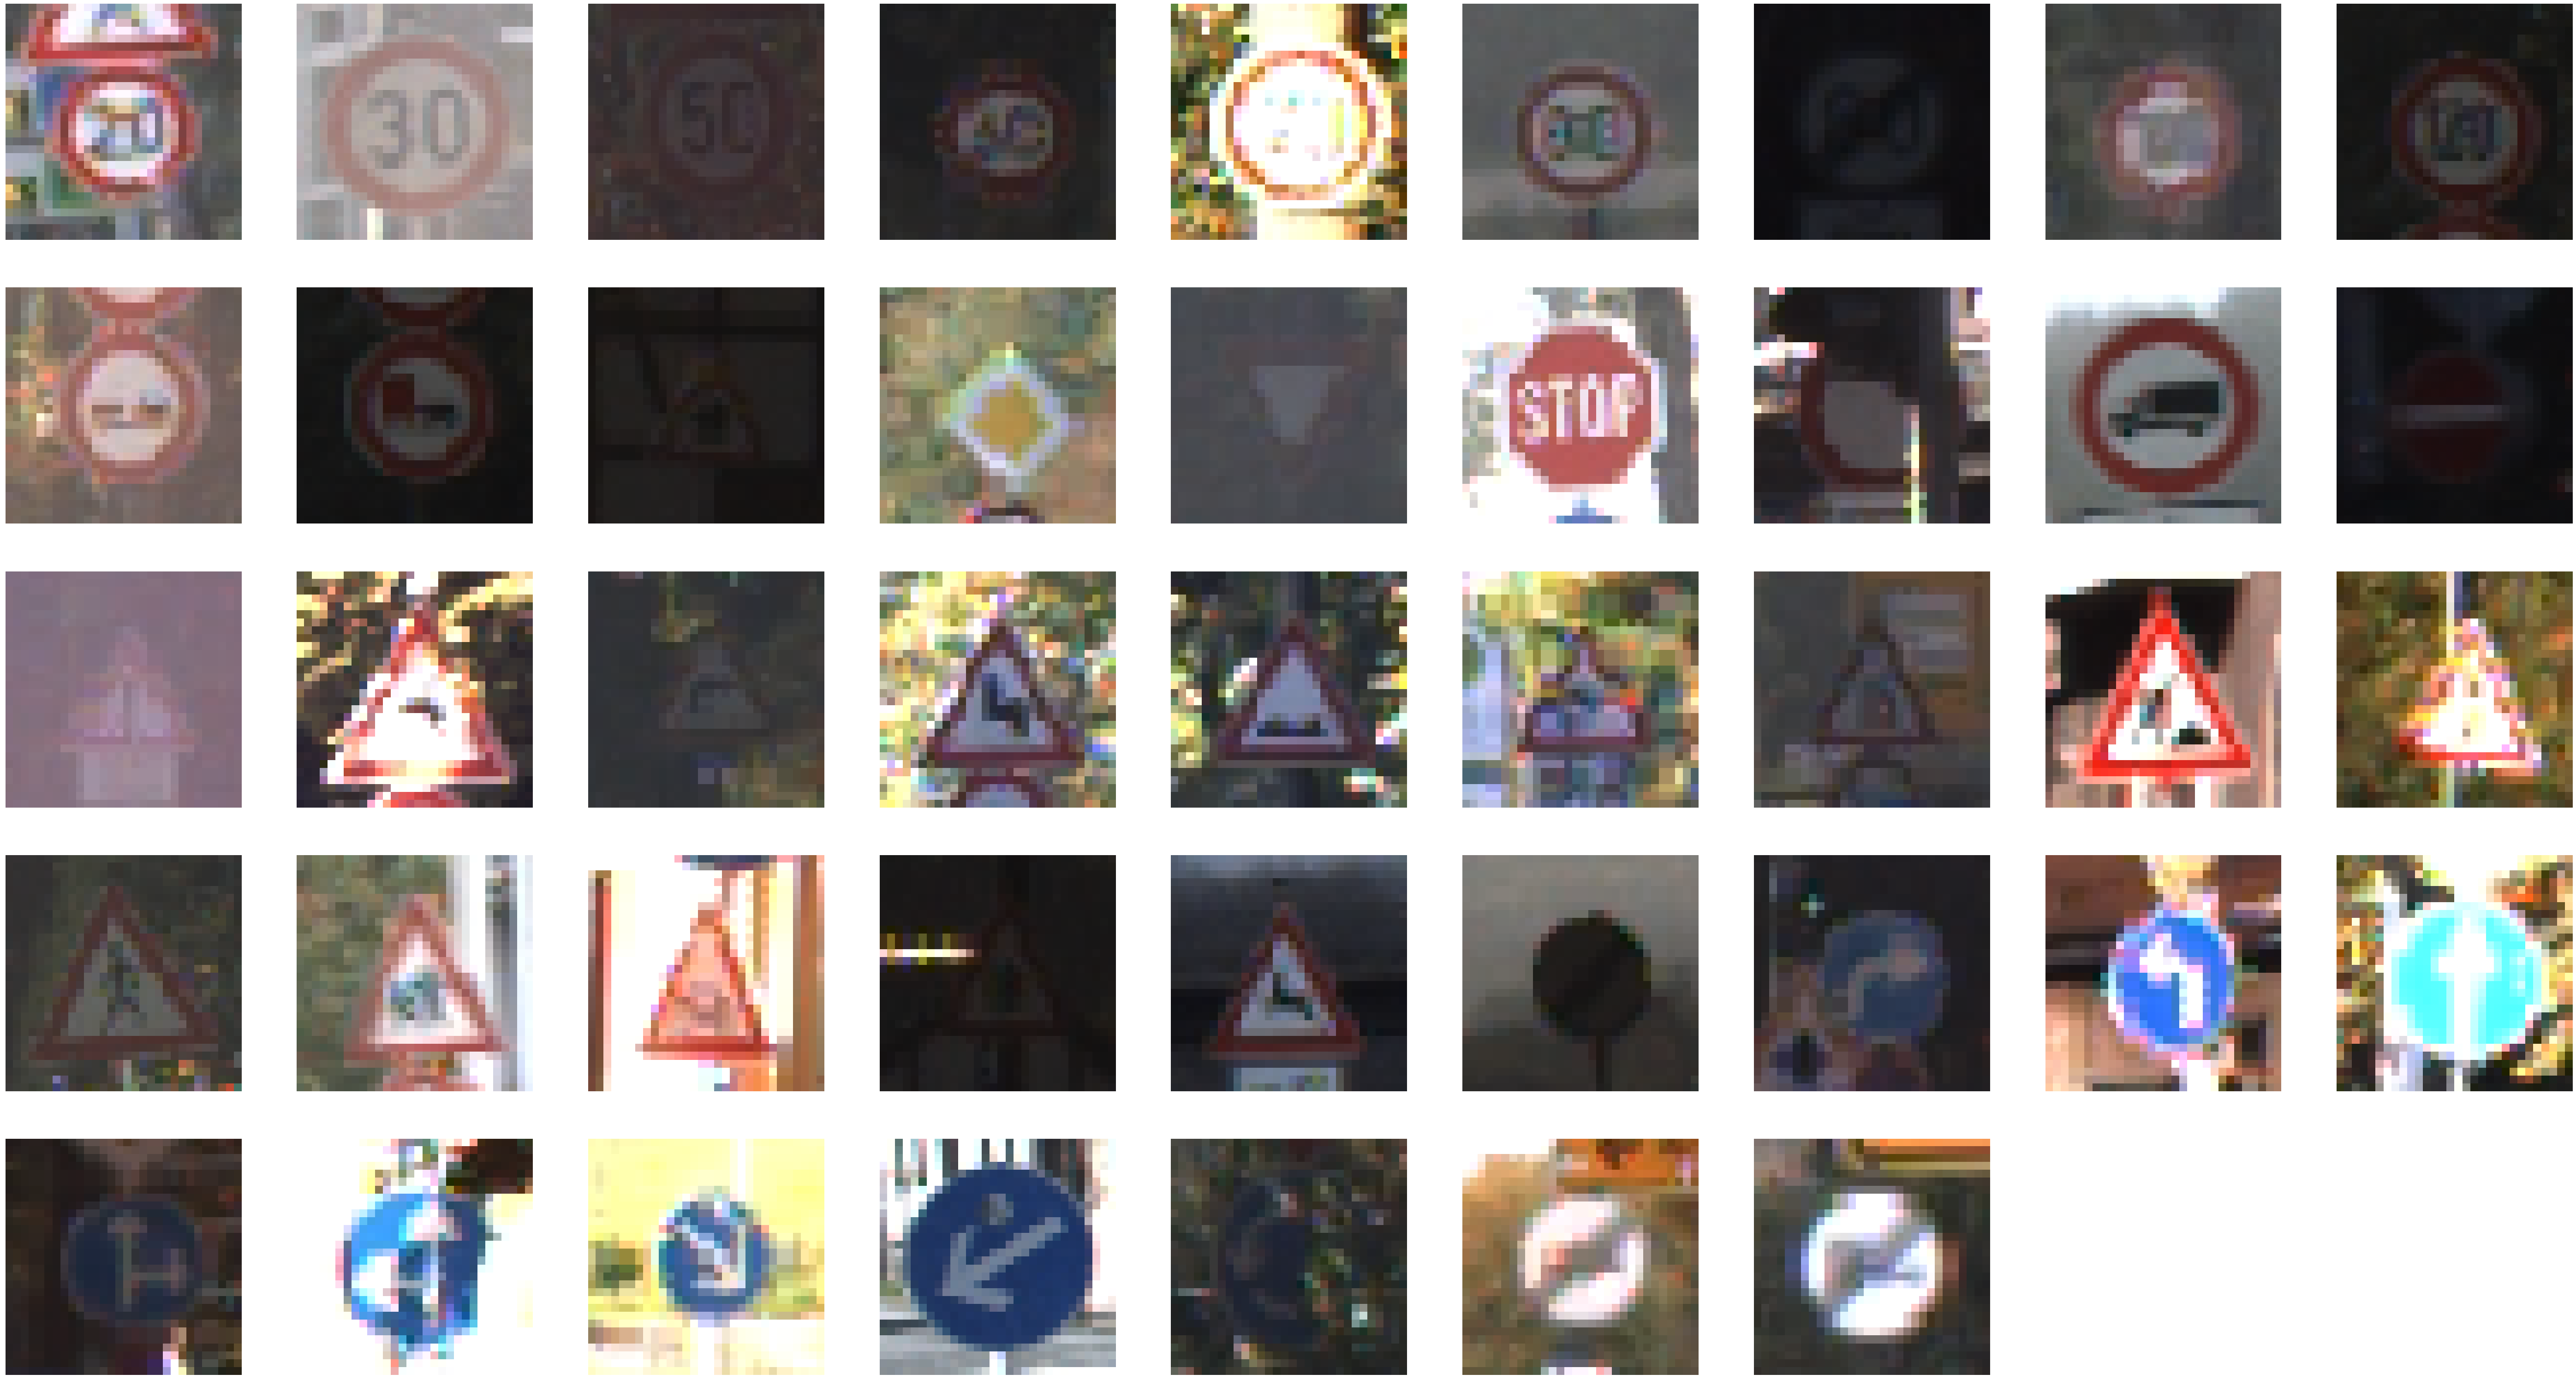

In [8]:
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(100,100))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(9, 9, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

# Label Overview

In [9]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Plotting Graph for showing the number of images in each class

In [10]:
import numpy as np

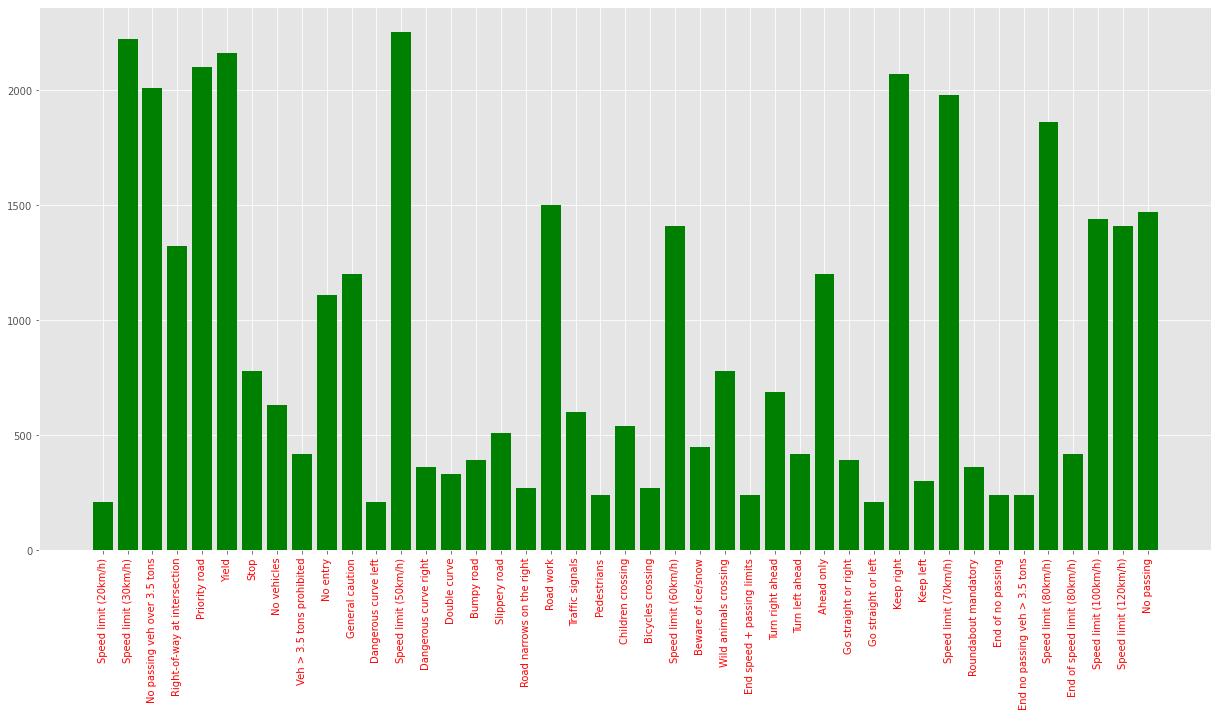

In [11]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number, color='green')
plt.xticks(class_num, rotation='vertical',color='red')
plt.show()

# Converting lists into numpy arrays

In [12]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [13]:
images, labels = load_data(train_path)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
labels = to_categorical(labels)

# Splitting training and testing dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [18]:
x_train/=255
x_test/=255

In [19]:
print('x_train shape:',x_train.shape)

x_train shape: (27446, 30, 30, 3)


In [20]:
print('Number of Signs in x_train',x_train.shape[0])

Number of Signs in x_train 27446


In [21]:
print('Number of Signs in x_test',x_test.shape[0])

Number of Signs in x_test 11763


In [22]:
print('x_test shape:',x_test.shape)

x_test shape: (11763, 30, 30, 3)


In [23]:
input_shape=( 30, 30, 3)

# Building the model

In [24]:
from keras.models import Sequential

In [25]:
model = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D

In [27]:
# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [28]:
# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

In [29]:
# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model

In [30]:

lr = 0.001
epochs = 30
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [31]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=20)

Epoch 1/20
601/601 [==============================] - 26s 37ms/step - loss: 1.8993 - accuracy: 0.4707 - val_loss: 0.6696 - val_accuracy: 0.8051
Epoch 2/20
601/601 [==============================] - 20s 33ms/step - loss: 0.5032 - accuracy: 0.8471 - val_loss: 0.2649 - val_accuracy: 0.9296
Epoch 3/20
601/601 [==============================] - 20s 33ms/step - loss: 0.2909 - accuracy: 0.9087 - val_loss: 0.1957 - val_accuracy: 0.9444
Epoch 4/20
601/601 [==============================] - 20s 33ms/step - loss: 0.2040 - accuracy: 0.9375 - val_loss: 0.1360 - val_accuracy: 0.9621
Epoch 5/20
601/601 [==============================] - 20s 33ms/step - loss: 0.1644 - accuracy: 0.9473 - val_loss: 0.0971 - val_accuracy: 0.9743
Epoch 6/20
601/601 [==============================] - 20s 33ms/step - loss: 0.1285 - accuracy: 0.9589 - val_loss: 0.1041 - val_accuracy: 0.9699
Epoch 7/20
601/601 [==============================] - 20s 33ms/step - loss: 0.1106 - accuracy: 0.9643 - val_loss: 0.0993 - val_accuracy:

In [32]:
model.save('My_Signs_Model.h5')
print("Saving the bot as My_Signs_Model.h5")

Saving the bot as My_Signs_Model.h5


# Evaluate the model

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

368/368 [==============================] - 3s 9ms/step - loss: 0.0689 - accuracy: 0.9833
test set accuracy:  98.33375811576843


# Plotting graphs for accuracy

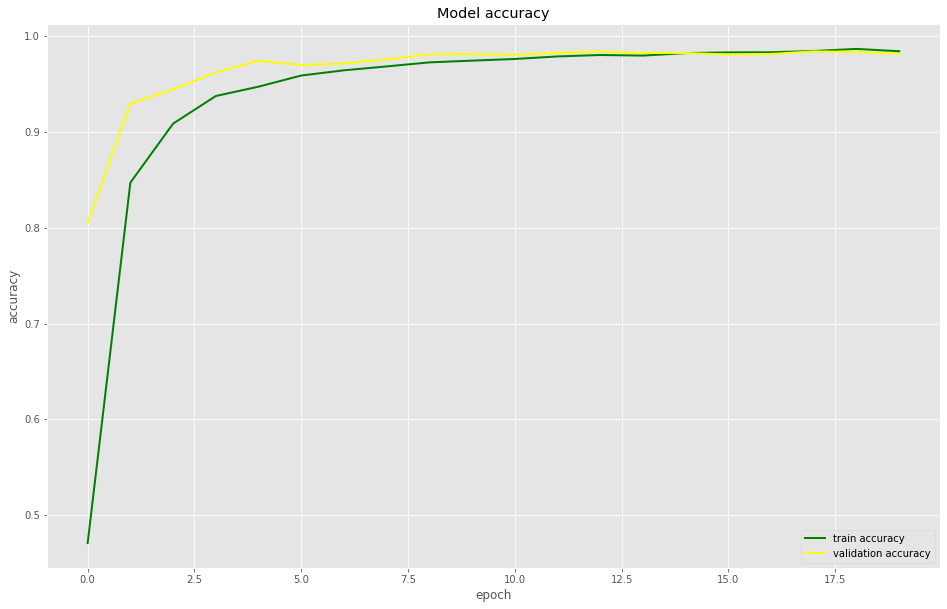

In [34]:
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='yellow')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

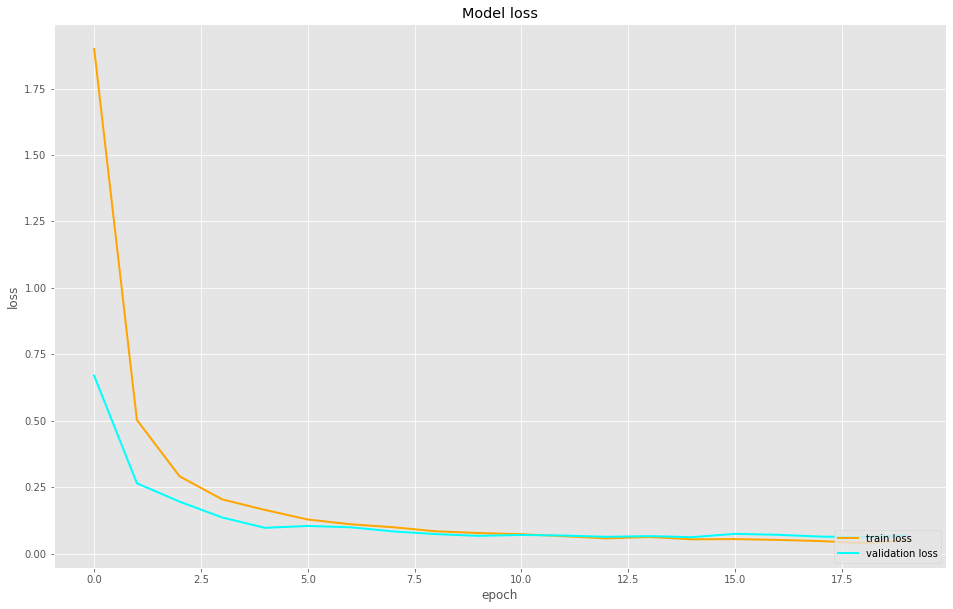

In [35]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='cyan')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='lower right')
plt.show()

# Testing accuracy and making predictions on Test data

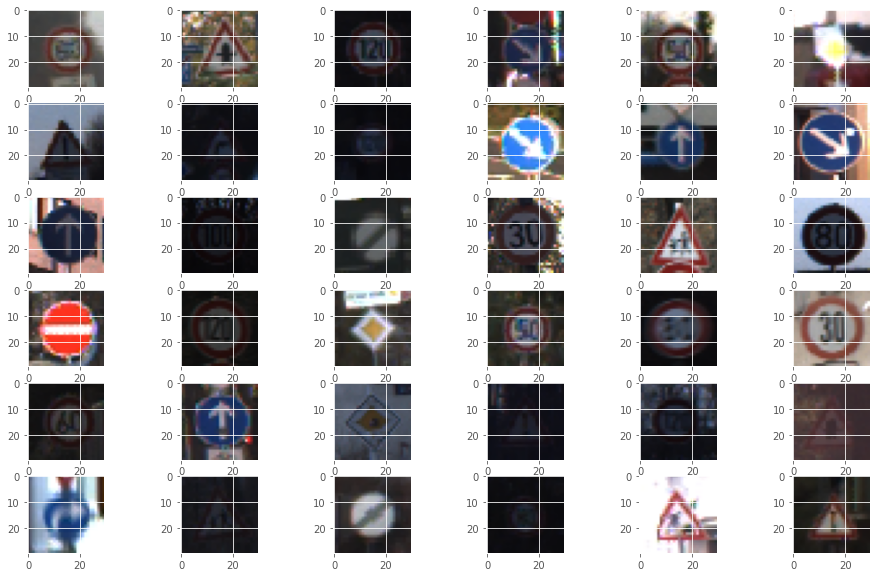

In [36]:
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_test[i])

2700
The predicted image is Speed limit (80km/h)
0.9833375811576843


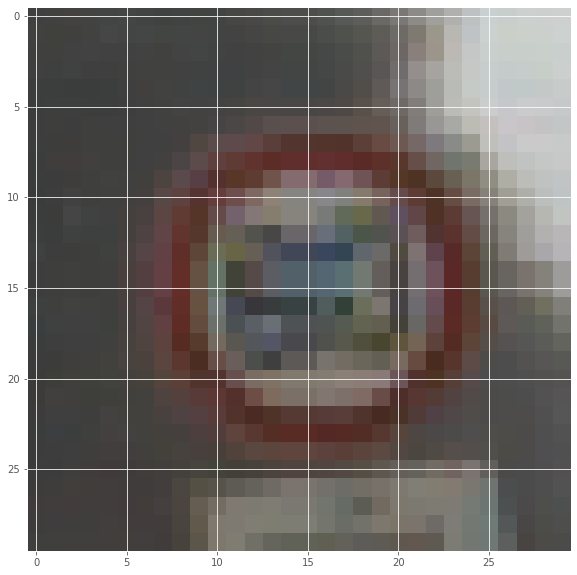

In [37]:
#Predicting the correct sign
image_index=0
plt.imshow(x_test[image_index])
n = np.array(x_test[image_index])
print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[model.predict(p).argmax()]
print("The predicted image is {}".format(pred))
from sklearn.metrics import accuracy_score
print(accuracy)

In [38]:
import pyttsx3
engineio=pyttsx3.init()
engineio.say(pred)
engineio.runAndWait()

In [39]:
model.save('Traffic_Sign_Classifier.h5')

# Loading the Pre-trained model for classify the Sign

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy 
import cv2
import pyttsx3
#load the trained model to classify sign
from keras.models import load_model
model = load_model('Traffic_Sign_Classifier.h5')

# Dictionary to label all traffic signs class.

In [2]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

# Initialise GUI

In [3]:
top=tk.Tk()
top.geometry('900x700')
top.title('Traffic sign classification')
nishu=Image.open("C:\\Users\\Nishant\\Downloads\\TechSaksham-Program-Final-Project\\Traffic Sign Recognition by Future Science\\knopka-ivy-jocViE_c8R0-unsplash.jpg")
Traffic_nishu=ImageTk.PhotoImage(nishu)
heading1=Label(top,image=Traffic_nishu,height=800,width=909)
heading1.place(x=0,y=0)
top.configure(background='#2F4F4F')
label=Label(top,background='red', font=('georgia',15,'bold'))
sign_image = Label(top)


In [4]:
def classify(test_path):
    global label_packed
    image = Image.open(test_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred=numpy.argmax(model.predict([image])[0], axis=-1)
    sign=classes[pred+1]
    print(sign)
    engineio=pyttsx3.init()
    engineio.say(sign)
    engineio.runAndWait()
    label.configure(foreground='#FFC0CB', text=sign) 

In [5]:
def show_classify_button(test_path):
    classify_b=Button(top,text="Recognize \n the \n Sign?",command=lambda: classify(test_path),padx=10,pady=10)
    classify_b.configure(background='#FEBD07', foreground='cyan',font=('georgia',15,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [6]:
FIRST=Image.open("C:\\Users\\Nishant\\Downloads\\TechSaksham-Program-Final-Project\\Traffic Sign Recognition by Future Science\\image of TSR.jpg")
Traffic_nishu1=ImageTk.PhotoImage(FIRST)
def Camera_button_new_window():
    cam_root=Toplevel()
    cam_root.geometry('900x700')
    cam_root.title('Real Time Traffic Sign Classification')
    heading2=Label(cam_root,image=Traffic_nishu1,height=899,width=990)
    heading2.place(x=0,y=0)
    cam_root.configure(background='#2F4F4F')
    label1=Label(cam_root,background='red', font=('georgia',15,'bold'))
    sign_image1 = Label(cam_root)
    real_time=Button(cam_root,text="Click \n for \n camera",command=open_camera,padx=10,pady=5)
    real_time.configure(background='lightpink', foreground='limegreen',font=('georgia',15,'bold'))
    real_time.place(x=400,y=400)
    heading3= Label(cam_root, text="Real Time Road Traffic Sign Recognition",pady=15, font=('georgia',15,'bold'))
    heading3.configure(background='crimson',foreground='#2F4F4F')
    heading3.pack(pady=60)

In [7]:
def open_camera():
    def readImage(train_path):
        img = cv2.imread(train_path+'/'+train_path,1)
        img = cv2.resize(img,(500,400))
        return img
    
    def returnRedness(img):
        yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
        y, u, v = cv2.split(yuv)
        return v

    def threshold(img,T=150):
        _, img = cv2.threshold(img,T,255,cv2.THRESH_BINARY)
        return img 

    def findContour(img):
        contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        return contours

    def findBiggestContour(contours):
        m = 0
        c = [cv2.contourArea(i) for i in contours]
        return contours[c.index(max(c))]

    def boundaryBox(img,contours):
        x, y, w, h = cv2.boundingRect(contours)
        img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        sign = img[y:(y+h) , x:(x+w)]
        return img, sign

    def preprocessingImageToClassifier(image=None,imageSize=28,mu=89.77428691773054,std=70.85156431910688):
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        image = cv2.resize(image,(imageSize,imageSize))
        image = (image - mu) / std
        image = image.reshape(1,imageSize,imageSize,1)
        return image

    def predict(sign):
        img = preprocessingImageToClassifier(sign,imageSize=28)
        return np.argmax(model.predict(img))

#--------------------------------------------------------------------------
    labelToText =  { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing'}
    cap=cv2.VideoCapture(0)
    while(True):
        _, frame = cap.read()
        redness = returnRedness(frame) # step 1 --> specify the redness of the image
        thresh = threshold(redness)
        try:
            contours = findContour(thresh)
            big = findBiggestContour(contours)
            if cv2.contourArea(big) > 3000:
                print(cv2.contourArea(big))
                img,sign = boundaryBox(frame,big)
                cv2.imshow('frame',img)
                print("Now,I see:",labelToText[predict(sign)])
            else:
                cv2.imshow('frame',frame)
               
        except:
            cv2.imshow('frame',frame)
            
        if cv2.waitKey(1) & 0xFF == ord('q') :
            break

    cap.release()
    cv2.destroyAllWindows()
    
    

In [8]:
def upload_image():
    try:
        test_path=filedialog.askopenfilename()
        uploaded=Image.open(test_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(test_path)
    except:
        pass
upload=Button(top,text="Select a traffic sign",command=upload_image,padx=10,pady=5)
upload.configure(background='#FEBD07', foreground='cyan',font=('georgia',15,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
real_time=Button(top,text="Recognize \n the \n real \n time \n Traffic \n Sign \n by \n opening \n the \n camera?",command=Camera_button_new_window,padx=10,pady=5)
real_time.configure(background='#FEBD07', foreground='cyan',font=('georgia',15,'bold'))
real_time.place(x=90,y=300)

In [9]:
heading= Label(top, text="Road Traffic Sign Recognition",pady=30, font=('georgia',25,'bold'))
heading.configure(background='#2F4F4F',foreground='#FFD700')
heading.pack(pady=60)
top.mainloop()

General caution
Slippery road
Stop
Veh > 3.5 tons prohibited
Road work


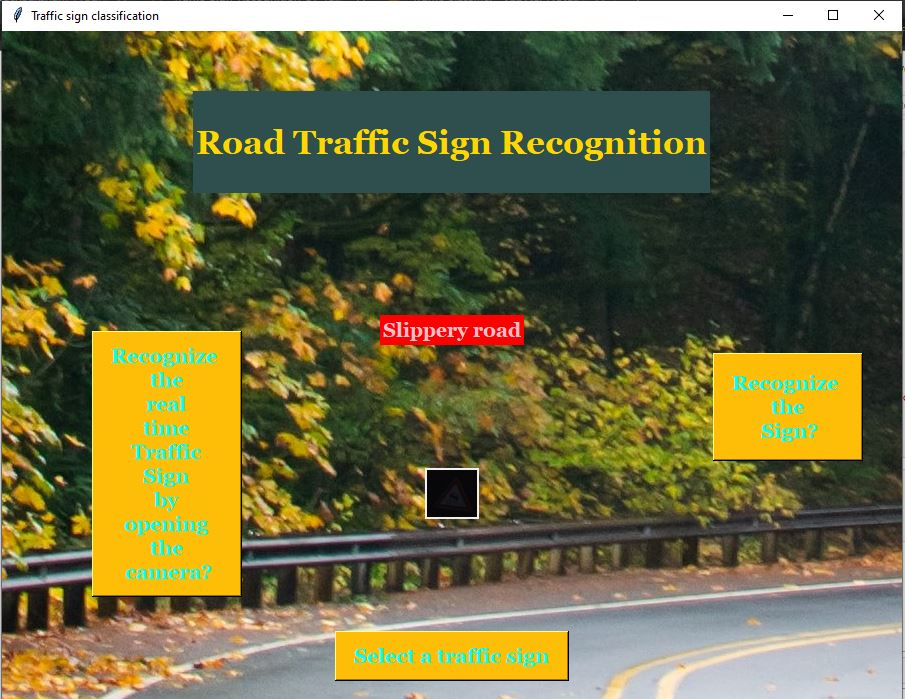

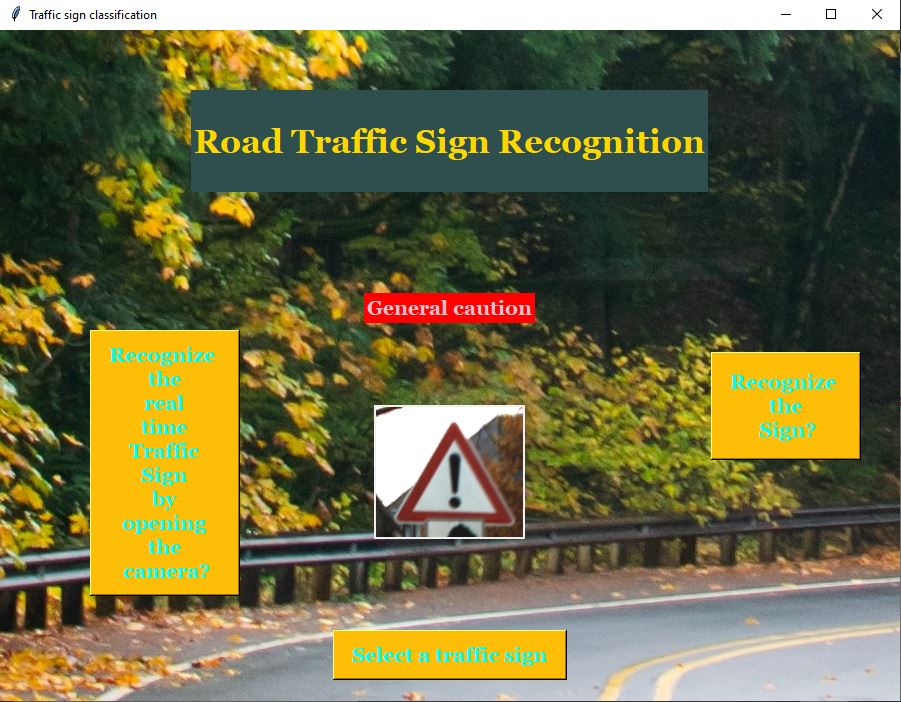

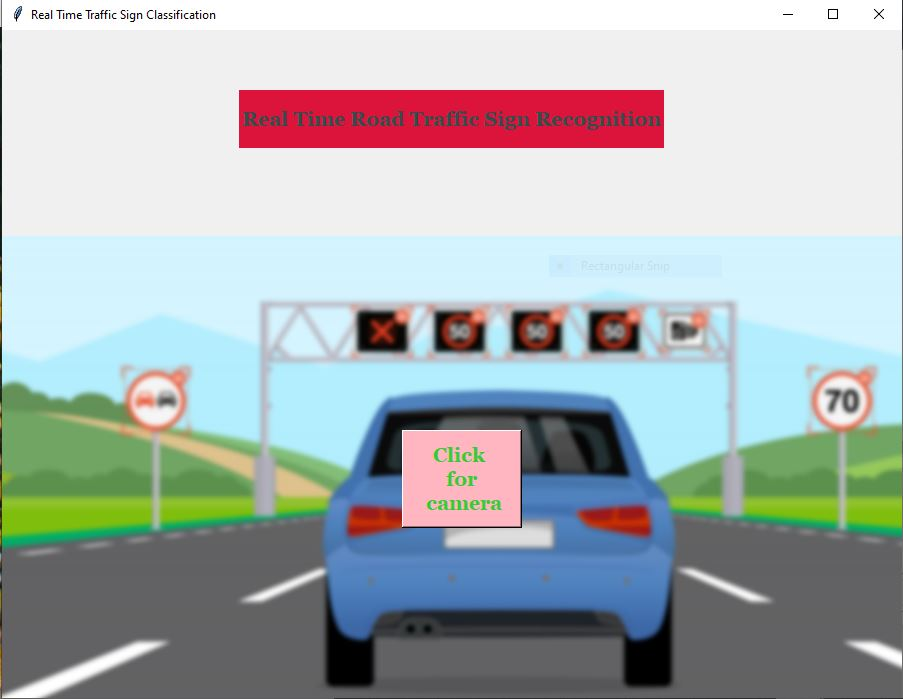

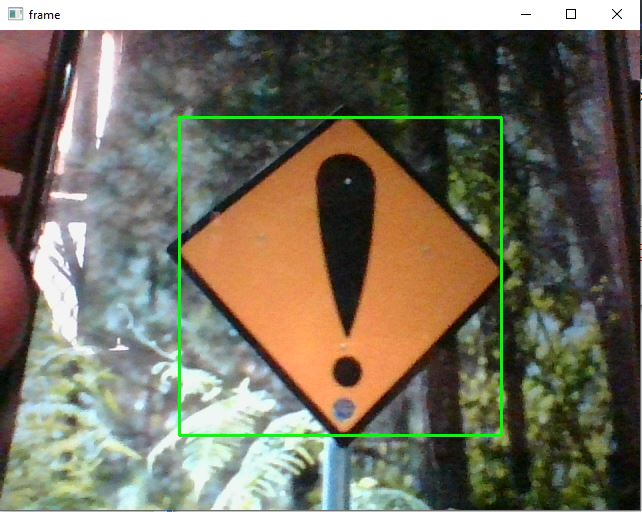
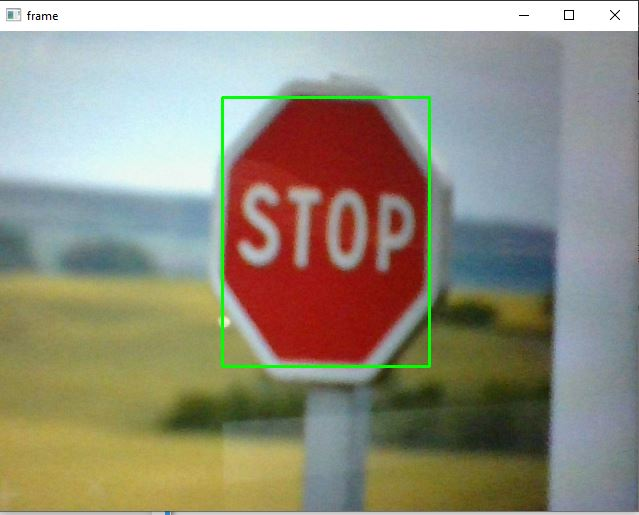

# ..............................................THANK YOU :))))........................................